In [1]:
#숫자 처리/그림 그리기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #차트그리기

# 딥러닝 모델/학습도구
import torch 
import torch.nn as nn #리니어나 ~ 랠루나 모델 가지고 있어
import torch.nn.functional as F
import torch.optim as optim #함수 최적화

#이미지 데이터셋과 전처리
import torchvision.datasets as datasets 
import torchvision.transforms as transforms #이미지 크기

#데이터를 배치(batch)로 꺼내주기
from torch.utils.data import DataLoader #원하는 배치 모양으로 섞어서
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True' 
#torch와 matplotlib 충돌 시 커널 죽는거 방지

In [2]:
fashion_train=datasets.FashionMNIST(root='../data00/fashionMnist_data',
                                    train=True,
                                    download=True,
                                    transform=transforms.Compose([transforms.ToTensor]))
fashion_test=datasets.FashionMNIST(root='../data00/fashionMnist_data',
                                    train=False,
                                    download=True,
                                    transform=transforms.Compose([transforms.ToTensor]))
                                                                        

In [3]:
print(fashion_test) #10000
print(fashion_train) #60000

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../data00/fashionMnist_data
    Split: Test
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data00/fashionMnist_data
    Split: Train
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )


In [4]:
print(fashion_test.data.shape)
print(fashion_test.targets.shape)

print(fashion_train.data.shape)
print(fashion_train.targets.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])
torch.Size([60000, 28, 28])
torch.Size([60000])


In [5]:
def plot(x,y):
  plt.figure(figsize=(8, 10))
  for i in range(len(x)):
    plt.subplot(5,5, i+1)

    img=(np.array(x[i], dtype='float')).reshape(28,28)
    plt.title(y[i].item())
    plt.imshow(img, cmap='gray')
    plt.axis('off')
  plt.show()

C:\Users\it\AppData\Local\Temp\ipykernel_12560\1378624112.py:6: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  img=(np.array(x[i], dtype='float')).reshape(28,28)


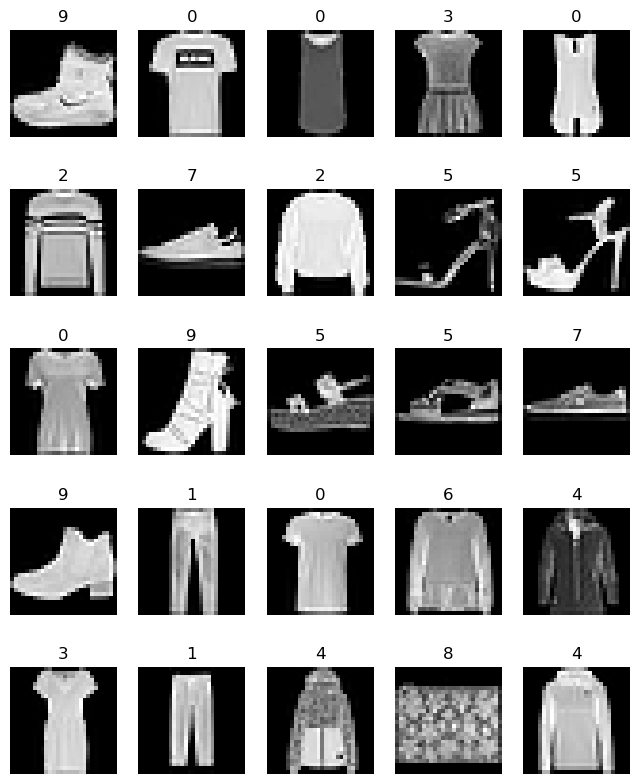

In [6]:
plot(fashion_train.data[:25], fashion_train.targets[:25]) #0~24까지 그려

0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [7]:
fashion_train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

245 제일 크네 저걸로 나눠야할 듯

In [8]:
x=fashion_train.data.float()/255
y=fashion_train.targets #레이블은 0~9까지 숫자니까 그대로 받았어
x[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

In [9]:
x.size()

torch.Size([60000, 28, 28])

In [10]:
x=x.view(x.size(0),-1) #(0, 1, 2 이고 0은 60000그대로 쓰라는거, -1 은 28*28 그대로)
print(x.size())

torch.Size([60000, 784])


In [11]:
input_size=x.size(-1)
print(input_size) #-1이니까 784

784


인풋은 784 들어간다!! 아웃풋은 10개!!

In [12]:
output_size=int(max(y))+1
print(output_size)

10


In [13]:
ratio = [0.8, 0.2]
train_cnt=int(x.size(0)*ratio[0]) #60000*0.8
valid_cnt=int(x.size(0)*ratio[1]) #60000*0.2
test_cnt=len(fashion_test)
print(train_cnt, valid_cnt, test_cnt) #전체 데이터에서 쪼갰어

48000 12000 10000


In [14]:
cnts = [train_cnt, valid_cnt]

In [15]:
indices = torch.randperm(x.size(0))

In [16]:
x=torch.index_select(x, dim=0, index=indices) 
y=torch.index_select(y, dim=-1, index=indices)

In [17]:
x1=list(x.split(cnts, dim=0)) # dim 데이터 기준 행방향으로 자른다. cnts 48000:12000 분리
y1=list(y.split(cnts, dim=0))
print(x1[0].shape, x1[1].shape, y1[0].shape, y1[1].shape)

torch.Size([48000, 784]) torch.Size([12000, 784]) torch.Size([48000]) torch.Size([12000])


In [18]:
fashion_test.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [19]:
x1+=[(fashion_test.data.float()/255).view(test_cnt, -1)] #3차원 데이터를 2차원으로
print(x1[2].shape)

torch.Size([10000, 784])


In [20]:
y1+=[fashion_test.targets]
print(y1[2].shape) 

torch.Size([10000])


모델링

In [21]:
model = nn.Sequential(
  nn.Linear(input_size, 500), # 784개의 숫자를 섞어서 500개 숫자를 만든다.
  #input_size 값이고, 활성화함수 ReLu, LeakyReKLu를 사용(음수 발생시).
  nn.LeakyReLU(),
  nn.Linear(500, 400),
  nn.LeakyReLU(),
  nn.Linear(400, 200),
  nn.LeakyReLU(),
  nn.Linear(200, 100),
  nn.LeakyReLU(),
  nn.Linear(100, 50),
  nn.LeakyReLU(),
  nn.Linear(50, output_size), #10가지 값으로 나눠져.
  nn.LeakyReLU(),
  # nn.Softmax() 2진 분류는 시그모이드, 3개 이상으면 소프트맥스
)

model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=200, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=200, out_features=100, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=100, out_features=50, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=50, out_features=10, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
)

In [22]:
crit=nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters())

In [23]:
from copy import deepcopy
epochs=1001
batch_size=256
lowest_loss=np.inf

best_model=None #변수선언
early_stop=50
lowest_epoch=np.inf

In [24]:
train_history, valid_history=[],[]

In [25]:
for epoch in range(epochs):
  indices = torch.randperm(x1[0].size(0)) #48000, 또 섞음, [0]은 훈련데이터, 인덱시즈 할거다? 뭔말이지
  x_=torch.index_select(x1[0], dim=0, index=indices) #훈련이미지 섞어
  y_=torch.index_select(y1[0], dim=0, index=indices)
  x_=x_.split(batch_size, dim=0)
  y_=y_.split(batch_size, dim=0) #256개로 짤라. 리스트 형식으로ㅓ

  train_loss, valid_loss= 0,0
  y_hat=[]

#트레이닝 데이터 제어
  for x_i, y_i in zip(x_, y_): 
    y_hat_i=model(x_i)
    loss=crit(y_hat_i, y_i.squeeze()) 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    train_loss+=float(loss)

  train_loss=train_loss/len(x_) 
 

    #벨리드 데이터 제어 
  with torch.no_grad(): 
    x_=x1[1].split(batch_size, dim=0)
    y_=y1[1].split(batch_size, dim=0)
    valid_loss=0

    for x_i, y_i in zip(x_, y_): 
      y_hat_i=model(x_i) 
      loss=crit(y_hat_i, y_i.squeeze()) 
      valid_loss+=float(loss) 
      y_hat+=[y_hat_i] 
    valid_loss=valid_loss/len(x_) 

  train_history+=[train_loss]
  valid_history+=[valid_loss]

  if epoch%10==0:
    print(f'epoch:{epoch}, train_loss:{train_loss}, valid_loss:{valid_loss}')
  


  if valid_loss <= lowest_loss:
    lowest_loss = valid_loss
    lowest_epoch = epoch
    best_model = deepcopy(model)
  else:
    if (early_stop > 0) and (lowest_epoch + early_stop < epoch):
        print(f'{lowest_epoch} 이후 {early_stop} epoch 동안 valid_loss 개선 없음')
        break  
    
print(f'epoch {lowest_epoch}일때 손실함수 {lowest_loss}가 검증데이터로 가장 낮은 손실함수를 가짐')

#훈련 끝!!

C:\Users\it\AppData\Local\Temp\ipykernel_12560\2552312028.py:18: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\autograd\generated\python_variable_methods.cpp:837.)
  train_loss+=float(loss)


epoch:0, train_loss:0.872124194781831, valid_loss:0.5506263502100681
epoch:10, train_loss:0.24409164052377355, valid_loss:0.3101058475514676
epoch:20, train_loss:0.17418367189771317, valid_loss:0.3338371623069682
epoch:30, train_loss:0.13051639336775592, valid_loss:0.39137223077581285
epoch:40, train_loss:0.09311509873480239, valid_loss:0.43907277317757304
epoch:50, train_loss:0.0694736288365056, valid_loss:0.4955189773376952
epoch:60, train_loss:0.06014020108875442, valid_loss:0.5348107053878459
12 이후 50 epoch 동안 valid_loss 개선 없음
epoch 12일때 손실함수 0.2996487671390493가 검증데이터로 가장 낮은 손실함수를 가짐


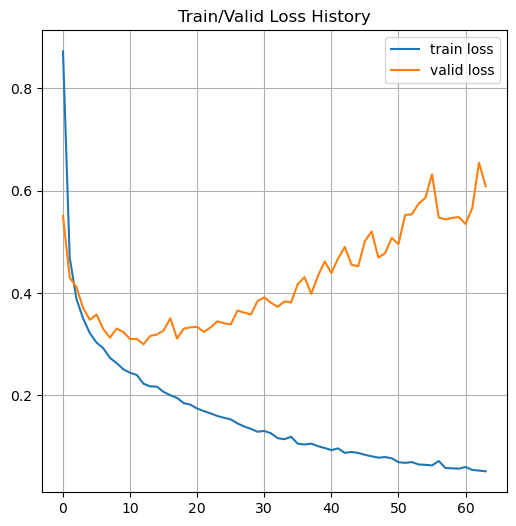

In [26]:
plot_from = 0
plt.figure(figsize=(6,6))
plt.grid(True)
plt.title('Train/Valid Loss History')
plt.plot(range(plot_from, len(train_history)), train_history[plot_from:], 
         label='train loss')
plt.plot(range(plot_from, len(valid_history)), valid_history[plot_from:], 
         label='valid loss')

plt.legend()
plt.show()

In [27]:
test_loss=0.0
best_model.eval() #평가모드로 동작바꿔. 결과 값이 달라질수 있어서 아래와 같이 써

y_hat=[]

with torch.no_grad(): #미분그래프만들지 마, 결과값의 랜덤성, 일관성 바꾸지.x
  x_=x1[-1].split(batch_size, dim=0)
  y_=y1[-1].split(batch_size, dim=0)

  for x_i, y_i in zip(x_, y_):
    y_hat_i=best_model(x_i)
    loss=crit(y_hat_i, y_i.squeeze())
    #CrossEntropyLoss라면 y_i만 써도 괜찮아.
    test_loss+=float(loss)
    #float(loss) 보다 loss.item()이 적절
    y_hat+=[y_hat_i]

test_loss=test_loss/len(x_)
y_hat=torch.cat(y_hat, dim=0) #세로로 붙힌다

print('test loss', test_loss)

test loss 0.32927436754107475


In [28]:
print(y_hat) #소수점 쭈욱, 한행이 10개의 값
print(torch.argmax(y_hat, dim=-1)) #열단위로 하면 0, 행단위로 1또는 -1 이거 뭔말..
#모델의 최종 선택 결과(예측), 각 행에서 가장 큰 값의 인덱스

tensor([[-9.0468e-02,  3.1672e+00, -3.2692e-02,  ...,  8.7516e+00,
         -7.9980e-03,  1.3108e+01],
        [ 8.7839e+00, -1.5894e-02,  1.8654e+01,  ..., -1.2102e-01,
         -9.3730e-03, -9.7312e-02],
        [ 8.1735e+00,  2.9964e+01,  3.3949e+00,  ..., -1.0530e-01,
         -1.9701e-02, -9.4065e-02],
        ...,
        [ 4.0129e+00, -9.0828e-02,  9.4690e-02,  ..., -4.1411e-02,
          1.5111e+01, -2.3366e-02],
        [ 2.7788e+00,  1.8226e+01,  3.5918e-01,  ..., -2.7418e-02,
         -4.4255e-03, -3.7433e-02],
        [-3.8065e-02, -6.7271e-02, -3.9439e-02,  ...,  6.2275e+00,
          2.2332e+00,  2.4016e+00]])
tensor([9, 2, 1,  ..., 8, 1, 5])


In [29]:
print(y1[-1])

tensor([9, 2, 1,  ..., 8, 1, 5])


In [30]:
correct_cnt=(y1[-1]==torch.argmax(y_hat, dim=1)).sum()
print(correct_cnt/10000) #데이터가 몇개인지 아니까 만 나눠

tensor(0.8840)


In [31]:
import pandas as pd
from sklearn.metrics import confusion_matrix

df=pd.DataFrame(confusion_matrix(y1[-1], torch.argmax(y_hat, dim=1)))
df

,0,1,2,3,4,5,6,7,8,9
0,831,1,21,44,4,1,88,0,10,0
1,0,974,1,19,3,0,2,0,1,0
2,9,1,769,16,117,0,88,0,0,0
3,17,7,7,909,42,0,12,0,6,0
4,0,0,73,25,854,0,47,0,1,0
5,0,0,0,0,0,937,0,36,1,26
6,111,0,61,49,96,0,675,0,8,0
7,0,0,0,0,0,9,0,962,0,29
8,6,1,2,7,4,4,6,2,968,0
9,0,0,0,0,0,4,1,34,0,961
